<a href="https://colab.research.google.com/github/Phassakorn512/CS240-termproject/blob/Visualization/termproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Member**
นายพัศกร สงวนเชื้อ 6709616723
* มีหน้าที่ วางแผน Timeline ประสานงาน ตรวจ notebook รวมไฟล์ และตรวจความพร้อมก่อนส่ง

นางสาวณัฐณิชา จุลโพธิ์ 6709540063
* มีหน้าที่กำหนด Problem framing และบอกจุดประสงค์ของหัวข้อที่ต้องการจะค้นคว้า

นายกฤษณะพล บุญเรือง 6709681057
* มีหน้าที่บอกรายละเอียด Data Acquisition

นายภูจิร ยังเหลือ 6709616806
* มีหน้าที่วิเคราะห์ข้อมูลเชิงสํารวจ (EDA) เพื่อค้นหา insights เเละ สร้างกราฟ

การิน สุภาเรือง 6709520065
* มีหน้าที่สร้างและ Train โมเดล

พัชรพล ศรีประเสริฐ 6709616707
* มีหน้าที่ Evaluate model และสรุป model ที่ดีสุด




# **Problem Framing**

**คุณภาพการนอน (sleep quality) มีความสัมพันธ์ต่ออัตราความเครียดอย่างไร?**

หัวข้อนี้มุ่งศึกษาและทำความเข้าใจว่า การนอนหลับที่ดีหรือไม่ดี มีผลต่อ ระดับความเครียดของเราอย่างไร?

---

สมมติฐาน:
*   นอนหลับดี (คุณภาพการนอนสูง) → ความเครียดลดลงเป็นส่วนใหญ่
*   นอนหลับไม่ดี (คุณภาพการนอนต่ำ) → ความเครียดเพิ่มขึ้นเป็นส่วนใหญ่

* หมายเหตุ: ปัจจัยอื่น ๆ เช่น ชั่วโมงการนอน, ภาระการเรียน, กิจกรรมนอกหลักสูตร, ผลการเรียน จะใช้ ช่วยในโมเดลทำนาย เพื่อเพิ่มความแม่นยำ แต่ไม่ใช่ตัวแปรที่เราจะ focus วิเคราะห์โดยตรง

---

**สิ่งที่เราจะหา / วิเคราะห์**

* วิเคราะห์ความสัมพันธ์ระหว่างคุณภาพการนอนกับความเครียด

* สร้างโมเดลทำนายคุณภาพการนอนจากความเครียด

---


**สิ่งที่จะได้จากงานนี้**

Insight / Data Interpretation: เข้าใจว่าระดับความเครียดส่งผลต่อคุณภาพการนอนอย่างไร

โมเดลทำนายคุณภาพการนอน: ใช้ความเครียดและปัจจัยอื่น ๆ เป็นตัวแปร

แนวทางปรับพฤติกรรม: ข้อเสนอเพื่อปรับพฤติกรรมลดความเครียดและเพิ่มคุณภาพการนอน

---

**ความสำคัญของปัญหา:**
* การนอนหลับเป็นกิจกรรมพื้นฐานที่มนุษย์ทำทุกวัน
* คุณภาพการนอนที่ดีมีผลต่อ ร่างกาย (ฟื้นฟูกล้ามเนื้อ ระบบภูมิคุ้มกัน) และ จิตใจ (ลดความเครียด เพิ่มสมาธิ)
* การนอนไม่เพียงพอหรือคุณภาพไม่ดีส่งผลเสียต่อชีวิตประจำวัน เช่น การเรียน การทำงาน และสุขภาพจิต
* การทำความเข้าใจความสัมพันธ์นี้ช่วยให้คนทั่วไปปรับปรุงการนอน เพื่อชีวิตที่มีคุณภาพและลดความเครียด

---

**แหล่งอ้างอิง:**
https://www.kaggle.com/datasets/sidraaazam/analyzing-student-stress-factors



In [2]:
#นำเข้า kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sidraaazam/analyzing-student-stress-factors")

print("Path to dataset files:", path)

100%|██████████| 864/864 [00:00<00:00, 2.03MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sidraaazam/analyzing-student-stress-factors/versions/1


In [3]:
# Load module
import pandas as pd # DataFrame
import seaborn as sb # graph
import matplotlib.pyplot as plt # Plot
from sklearn.preprocessing import MinMaxScaler # scaling
from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.preprocessing import StandardScaler # standardize features
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.metrics import accuracy_score, classification_report # model evaluation metrics

In [4]:
import os

os.listdir(path)

['Student Stress Factors (2).csv']

# Data Acquisition

In [5]:

df = pd.read_csv(path + "/Student Stress Factors (2).csv")

df.head()

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [6]:
#Rename Column
column_map = {
    'Kindly Rate your Sleep Quality 😴': 'Sleep_Quality',
    'How many times a week do you suffer headaches 🤕?': 'Headaches',
    'How would you rate you academic performance 👩‍🎓?': 'Academic_Performance',
    'how would you rate your study load?': 'Study_Load',
    'How many times a week you practice extracurricular activities 🎾?': 'Extracurricular',
    'How would you rate your stress levels?': 'Stress_Levels'
}

df = df.rename(columns=column_map)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sleep_Quality         520 non-null    int64
 1   Headaches             520 non-null    int64
 2   Academic_Performance  520 non-null    int64
 3   Study_Load            520 non-null    int64
 4   Extracurricular       520 non-null    int64
 5   Stress_Levels         520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


**ข้อมูลคุณลักษณะ**

* Kindly Rate your Sleep Quality 😴(Sleep_Quality): คุณภาพการนอน ของนักเรียน [ระดับคะแนน: 1 (แย่ที่สุด) ถึง 5 (ดีที่สุด)]

* How many times a week do you suffer headaches 🤕(Headaches): ความถี่ของการปวดศีรษะ ต่อสัปดาห์ [จำนวนครั้ง: 1 ถึง 5]

* How would you rate you academic performance 👩‍🎓(Academic_Performance): ระดับผลการเรียน ของนักเรียน [ระดับคะแนน: 1 (แย่ที่สุด) ถึง 5 (ดีที่สุด)]

* how would you rate your study load?(Sutdy_Load): ระดับภาระการเรียน ของนักเรียน [ระดับคะแนน: 1 (เบาที่สุด) ถึง 5 (หนักที่สุด)]

* How many times a week you practice extracurricular activities 🎾(Extracurricular): ความถี่ของการทำกิจกรรมนอกหลักสูตร ต่อสัปดาห์ [จำนวนครั้ง: 1 ถึง 5]

* How would you rate your stress levels?(Stress_Levels): ระดับความเครียด ของนักเรียน [ระดับคะแนน: 1 (น้อยที่สุด) ถึง 5 (มากที่สุด)]

#Data Preparation

Data Cleaning



หาค่าตัวที่ซ้ำกัน (Duplicate)

In [8]:
print(f"จำนวนแถว: {len(df)}")

จำนวนแถว: 520


In [9]:
duplicate_rows = df.duplicated().sum()
print(f"จำนวนแถวที่ซ้ำซ้อน: {duplicate_rows}")

จำนวนแถวที่ซ้ำซ้อน: 416


ข้อมูลซ้ำกันเป็นเพราะ ข้อมูลชุดนี้แสดงผลเป็นตัวเลข

In [10]:
#หาจำนวน ตัวซ้ำ duplicate ถ้าซ้ำจะแสดงเป็น true
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
515,True
516,True
517,True
518,True


หา Missing Data

In [11]:
#หาmissingdata
print(df.isnull().sum())

Sleep_Quality           0
Headaches               0
Academic_Performance    0
Study_Load              0
Extracurricular         0
Stress_Levels           0
dtype: int64


Handling Outliers

In [12]:
#หา outlier
Q1 = df.quantile(0.25)#หาq1
Q3 = df.quantile(0.75)#หาq1

IQR = Q3-Q1 #หาพิสัยระหว่างquantile
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [13]:
#หาค่านอกเกณฑ์ทางลบ
print(lower_bound)

Sleep_Quality          -1.0
Headaches              -2.0
Academic_Performance    1.5
Study_Load             -1.0
Extracurricular        -3.5
Stress_Levels          -1.0
dtype: float64


In [14]:
print("Sleep_Quality",(df["Sleep_Quality"]<-1.0).sum()) #
print("Headaches",(df["Headaches"]<-2.0).sum())
print("Academic_Performance",(df["Academic_Performance"]<1.5).sum())
print("Study_Load",(df["Study_Load"]<1.0).sum())
print("Extracurricular",(df["Extracurricular"]<-3.5).sum())
print("Stress_Levels",(df["Stress_Levels"]<-1.0).sum())

Sleep_Quality 0
Headaches 0
Academic_Performance 35
Study_Load 0
Extracurricular 0
Stress_Levels 0


In [ ]:
#หาค่านอกเกณฑ์ทางบวก
print(upper_bound)

Sleep_Quality           7.0
Headaches               6.0
Academic_Performance    5.5
Study_Load              7.0
Extracurricular         8.5
Stress_Levels           7.0
dtype: float64


In [ ]:
print("Sleep_Quality",(df["Sleep_Quality"]>7.0).sum()) #
print("Headaches",(df["Headaches"]>6.0).sum())
print("Academic_Performance",(df["Academic_Performance"]>5.5).sum())
print("Study_Load",(df["Study_Load"]>7.0).sum())
print("Extracurricular",(df["Extracurricular"]>8.5).sum())
print("Stress_Levels",(df["Stress_Levels"]>7.0).sum())

Sleep_Quality 0
Headaches 0
Academic_Performance 0
Study_Load 0
Extracurricular 0
Stress_Levels 0


In [ ]:
#รวมค่านอกเกณฑ์ทั้งหมด
outliers = ((df < lower_bound) | (df > upper_bound))
print(outliers.sum())

Sleep_Quality            0
Headaches                0
Academic_Performance    35
Study_Load               0
Extracurricular          0
Stress_Levels            0
dtype: int64


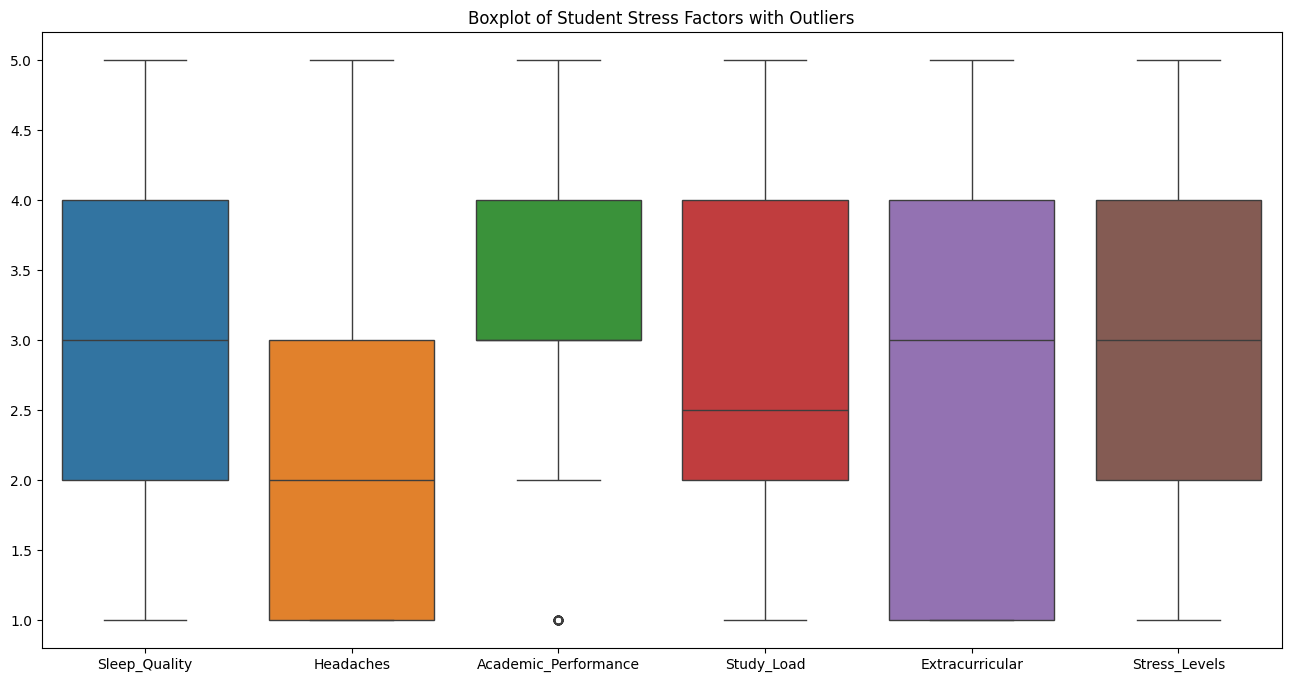

In [ ]:
# ทำแผนภาพกล่อง Boxplot ก่อนจัดการ outliers

plt.figure(figsize=(16, 8))
sb.boxplot(data=df)
plt.xticks(rotation=0)
plt.title('Boxplot of Student Stress Factors with Outliers')
plt.show()

In [ ]:
#outliers ทั้งหมดของ Academic_Performance
outlier_mask = (df['Academic_Performance'] < lower_bound["Academic_Performance"]) | (df['Academic_Performance'] > upper_bound["Academic_Performance"])
print(df[outlier_mask]['Academic_Performance'])

4      1
6      1
7      1
17     1
36     1
49     1
83     1
108    1
110    1
111    1
121    1
140    1
153    1
187    1
212    1
214    1
215    1
225    1
244    1
257    1
291    1
316    1
318    1
319    1
329    1
348    1
361    1
395    1
420    1
422    1
423    1
433    1
452    1
465    1
499    1
Name: Academic_Performance, dtype: int64


Capping คือการ แทนที่ ค่าผิดปกติที่อยู่ภายนอกขอบเขตที่กำหนดด้วย ค่าขอบเขต (Boundary Value) ที่ใกล้ที่สุด

In [ ]:
# Capping Outliers ในคอลัมน์ Academic_Performance
# แทนที่ค่าที่สูงกว่า upper_bound ด้วย upper_bound
df.loc[df['Academic_Performance'] > upper_bound["Academic_Performance"], 'Academic_Performance'] = upper_bound["Academic_Performance"]

# แทนที่ค่าที่ต่ำกว่า lower_bound ด้วย lower_bound
df.loc[df['Academic_Performance'] < lower_bound["Academic_Performance"], 'Academic_Performance'] = lower_bound["Academic_Performance"]

print("Outliers ได้รับการจัดการเรียบร้อยแล้วด้วยวิธี Capping.")

Outliers ได้รับการจัดการเรียบร้อยแล้วด้วยวิธี Capping.


/tmp/ipython-input-857473446.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Academic_Performance'] > upper_bound["Academic_Performance"], 'Academic_Performance'] = upper_bound["Academic_Performance"]


In [ ]:
# ตรวจสอบการนับ Outliers หลังการจัดการ
outliers_after_capping = ((df['Academic_Performance'] < lower_bound["Academic_Performance"]) | (df['Academic_Performance'] > upper_bound["Academic_Performance"])).sum()

print(f"จำนวน Outliers ใน Academic_Performance หลังการทำ Capping: {outliers_after_capping}")
# ผลลัพธ์ควรจะเป็น: 0

จำนวน Outliers ใน Academic_Performance หลังการทำ Capping: 0


In [ ]:
#รวมค่านอกเกณฑ์ทั้งหมด
outliers = ((df < lower_bound) | (df > upper_bound))
print(outliers.sum())

Sleep_Quality           0
Headaches               0
Academic_Performance    0
Study_Load              0
Extracurricular         0
Stress_Levels           0
dtype: int64


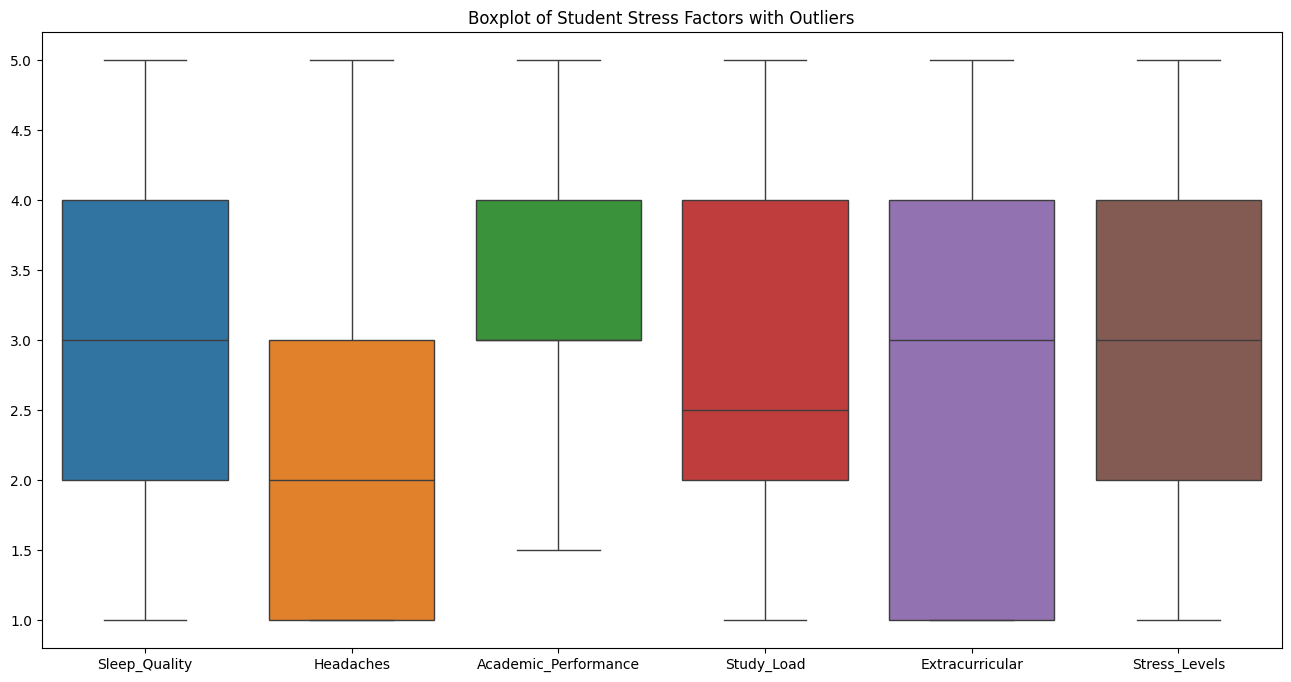

In [ ]:
# ทำแผนภาพกล่อง Boxplot หลังจัดการ outliers

plt.figure(figsize=(16, 8))
sb.boxplot(data=df)
plt.xticks(rotation=0)
plt.title('Boxplot of Student Stress Factors with Outliers')
plt.show()

Standardization

In [ ]:
features_to_scale = ["Sleep_Quality", "Headaches", "Academic_Performance",
                     "Study_Load", "Extracurricular", "Stress_Levels"]

scaler = MinMaxScaler()

# แปลงข้อมูล
scaled_data = scaler.fit_transform(df[features_to_scale])

# แสดงผลลัพธ์ (อยู่ระหว่าง 0 - 1)
print("ข้อมูลหลังทำ Standardization (ค่าอยู๋ระหว่าง 0 - 1):")
print(pd.DataFrame(scaled_data, columns=features_to_scale).head())

ข้อมูลหลังทำ Standardization (ค่าอยู๋ระหว่าง 0 - 1):
   Sleep_Quality  Headaches  Academic_Performance  Study_Load  \
0           0.50       0.00              0.428571        0.75   
1           0.75       0.00              0.142857        0.50   
2           0.25       0.00              0.142857        0.00   
3           0.50       0.25              0.428571        0.25   
4           0.25       0.50              0.000000        1.00   

   Extracurricular  Stress_Levels  
0             0.25           0.50  
1             0.50           0.25  
2             0.75           0.75  
3             0.50           0.50  
4             1.00           0.50  


#EDA

In [ ]:
#ตารางแจกแจงความถี่และความถี่สัมพัทธ์ ของ Sleep_Quality
frequency_table = df['Sleep_Quality'].value_counts()
relative_frequency_table = df['Sleep_Quality'].value_counts(normalize=True) * 100
relative_frequency_table = relative_frequency_table.round(2)
relative_frequency_table.name = 'Relative Frequency (%)'

#แสดงผลตารางความถี่
print("--- ตารางความถี่ (Frequency) ---")
print(frequency_table)
print("\n--- ตารางความถี่สัมพัทธ์ (Relative Frequency) ---")
print(relative_frequency_table)

--- ตารางความถี่ (Frequency) ---
Sleep_Quality
3    185
4    120
2    115
5     65
1     35
Name: count, dtype: int64

--- ตารางความถี่สัมพัทธ์ (Relative Frequency) ---
Sleep_Quality
3    35.58
4    23.08
2    22.12
5    12.50
1     6.73
Name: Relative Frequency (%), dtype: float64


In [ ]:
#Median and Mode of Sleep_Quality
# 1. หา Median (มัธยฐาน)
median_value = df['Sleep_Quality'].median()
print(f"Median (มัธยฐาน) ของ Sleep_Quality: {median_value}")

# 2. หา Mode (ฐานนิยม)
mode_value = df['Sleep_Quality'].mode()[0]
print(f"Mode (ฐานนิยม) ของ Sleep_Quality: {mode_value}")

Median (มัธยฐาน) ของ Sleep_Quality: 3.0
Mode (ฐานนิยม) ของ Sleep_Quality: 3


จากตารางแจกแจงความถี่, ฐานนิยมและมัธยฐาน

คุณภาพการนอนส่วนใหญ่จะอยู่ในระดับ 3 หรือปานกลาง

In [ ]:
#ตารางแจกแจงความถี่และความถี่สัมพัทธ์ ของ Stress_Levels
frequency_table = df['Stress_Levels'].value_counts()
relative_frequency_table = df['Stress_Levels'].value_counts(normalize=True) * 100
relative_frequency_table = relative_frequency_table.round(2)
relative_frequency_table.name = 'Relative Frequency (%)'

#แสดงผลตารางความถี่
print("--- ตารางความถี่ (Frequency) ---")
print(frequency_table)
print("\n--- ตารางความถี่สัมพัทธ์ (Relative Frequency) ---")
print(relative_frequency_table)

--- ตารางความถี่ (Frequency) ---
Stress_Levels
3    125
1    110
2    105
4    100
5     80
Name: count, dtype: int64

--- ตารางความถี่สัมพัทธ์ (Relative Frequency) ---
Stress_Levels
3    24.04
1    21.15
2    20.19
4    19.23
5    15.38
Name: Relative Frequency (%), dtype: float64


จากตารางแจกแจงความถี่, ฐานนิยมและมัธยฐาน

ระดับความเครียดส่วนใหญ่จะอยู่ในระดับ 3 หรือปานกลาง

In [ ]:
#Median and Mode of Stress_Levels
# 1. หา Median (มัธยฐาน)
median_value = df['Stress_Levels'].median()
print(f"Median (มัธยฐาน) ของ Stress_Levels: {median_value}")

# 2. หา Mode (ฐานนิยม)
mode_value = df['Stress_Levels'].mode()[0]
print(f"Mode (ฐานนิยม) ของ Stress_Levels: {mode_value}")

Median (มัธยฐาน) ของ Stress_Levels: 3.0
Mode (ฐานนิยม) ของ Stress_Levels: 3


Explain....

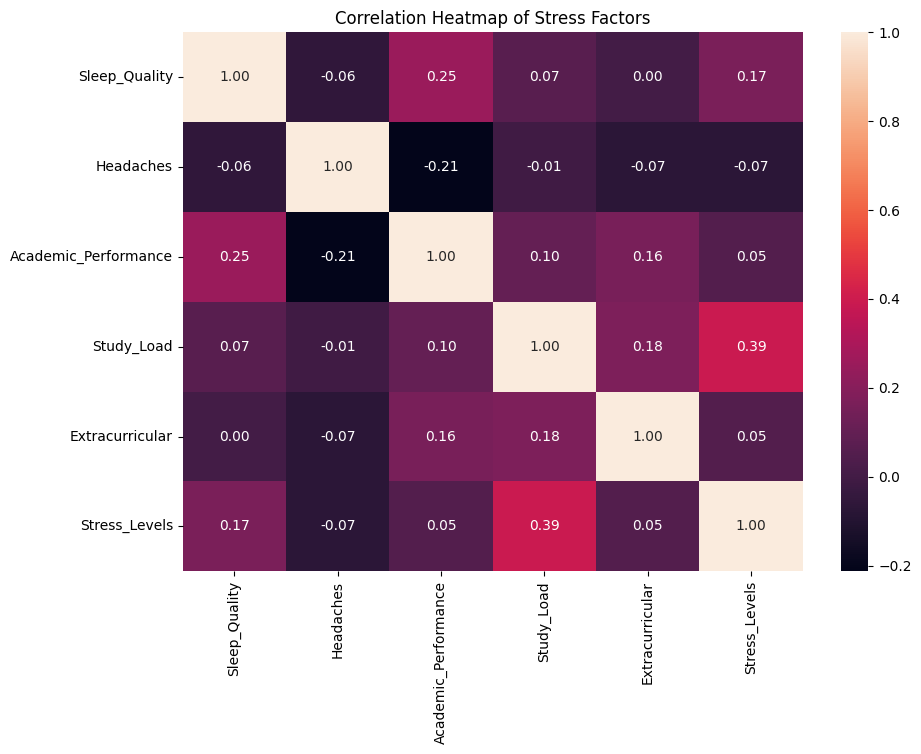

In [ ]:
# สร้างกราฟ Heatmap แสดงค่า Correlation ของ Stress Factors
corr = df.corr()
plt.figure(figsize=(10, 7))
sb.heatmap(corr, annot=True , fmt='.2f')
plt.title('Correlation Heatmap of Stress Factors')
plt.show()

เราสามารถสรุป "ปัจจัยความเครียด" (Stress Factors) ได้ดังนี้:

ความสัมพันธ์ที่ชัดเจนที่สุด (สีชมพูเข้มสุด):

Study_Load (ภาระการเรียน) กับ Stress_Levels (ระดับความเครียด) มีค่า 0.39

แปลว่า: ยิ่งมีภาระการเรียนหนัก (Study_Load สูง) ก็ยิ่งมีแนวโน้มที่จะเครียดมาก (Stress_Levels สูง) นี่คือความสัมพันธ์ทางบวกที่ชัดเจนที่สุดในตารางนี้

ความสัมพันธ์แบบสวนทางที่ชัดที่สุด (สีเกือบมืด):

Academic_Performance (ผลการเรียน) กับ Headaches (อาการปวดหัว) มีค่า -0.21

แปลว่า: คนที่ผลการเรียนดี มีแนวโน้มที่จะปวดหัวน้อยกว่า (หรือกลับกันคือ คนที่ปวดหัวบ่อยๆ อาจส่งผลเสียต่อผลการเรียน)

ประเด็นน่าสนใจอื่นๆ:

Sleep_Quality (คุณภาพการนอน) สัมพันธ์ทางบวกกับ Academic_Performance (ผลการเรียน) (ค่า 0.25)

แปลว่า: ยิ่งนอนมีคุณภาพ ผลการเรียนก็ยิ่งมีแนวโน้มจะดีขึ้น

Extracurricular (กิจกรรมนอกหลักสูตร) แทบไม่สัมพันธ์กับ Stress_Levels (ความเครียด) (ค่า 0.05)

แปลว่า: ในชุดข้อมูลนี้ การทำกิจกรรมนอกหลักสูตรไม่ได้ทำให้เครียดเพิ่มขึ้นอย่างชัดเจน

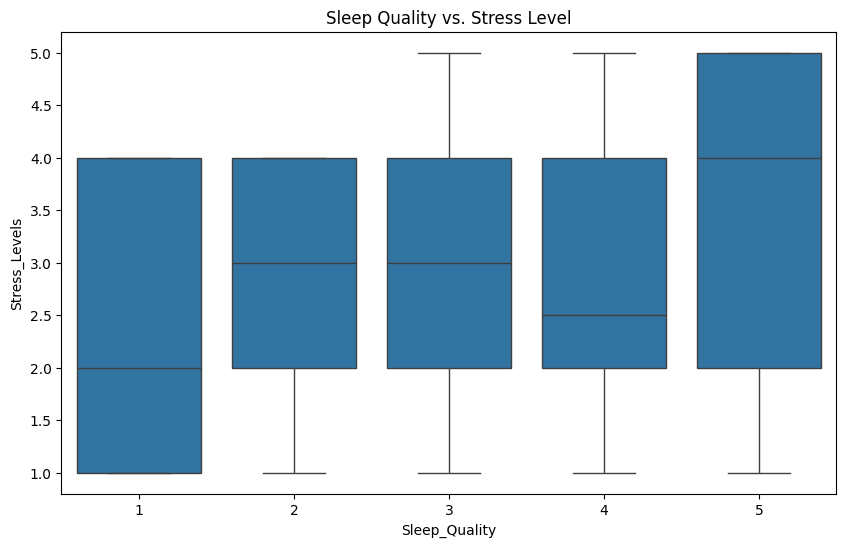

In [ ]:
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Stress Level (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y='Stress_Levels', data=df)
plt.title('Sleep Quality vs. Stress Level')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ ระดับความเครียด (Stress Levels)
โดยแกน X แทนระดับคุณภาพการนอน และแกน Y แทนระดับความเครียดของนักเรียน

จากกราฟจะเห็นได้ว่า :

กลุ่มที่มี Sleep Quality ต่ำ (ระดับ 1–2) มีค่ามัธยฐานของความเครียดค่อนข้างสูง และช่วงการกระจายของข้อมูลกว้าง
หมายความว่านักเรียนกลุ่มนี้มีระดับความเครียดสูงและไม่คงที่

ในขณะที่กลุ่มที่มี Sleep Quality สูง (ระดับ 4–5) ค่ามัธยฐานของความเครียดลดลง และช่วงการกระจายแคบลง
สะท้อนว่านักเรียนที่นอนหลับดีมักมีความเครียดน้อยกว่าและมีเสถียรภาพทางอารมณ์มากกว่า

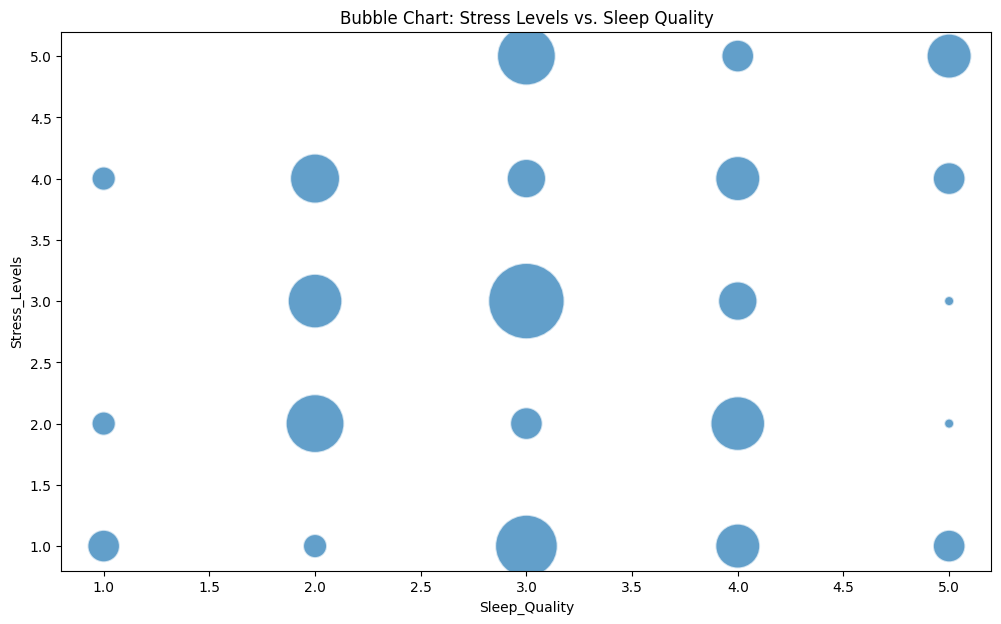

In [ ]:
# สร้างกราฟ Bubble Chart โดยให้ Sleep Quality (แกน X) เทียบกับ Stress Level (แกน Y)
# 1. สร้างตารางนับจำนวน (Aggregate)
# เราจะนับว่า ในแต่ละคู่ (Sleep_Quality, Stress_Levels) มีข้อมูลซ้ำกันกี่แถว
df_counts = df.groupby(['Sleep_Quality', 'Stress_Levels']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot() แต่กำหนด 'size' เป็น 'Count'
plt.figure(figsize=(12, 7))
sb.scatterplot(
    x='Sleep_Quality',
    y='Stress_Levels',
    size='Count',  # <-- จุดสำคัญ: ใช้ 'Count' เป็นขนาด
    data=df_counts,
    sizes=(50, 3000), # กำหนดขนาดฟองสบู่เล็กสุดและใหญ่สุด
    alpha=0.7,         # ทำให้โปร่งใสเผื่อทับซ้อนกัน
    legend= False
)

plt.title('Bubble Chart: Stress Levels vs. Sleep Quality')
plt.show()

กราฟ Bubble Chart นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ ระดับความเครียด (Stress Levels)
โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน” ที่มีค่าการนอนและระดับความเครียดอยู่ในระดับเดียวกัน
ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคนในแต่ละกลุ่มข้อมูล”

เมื่อพิจารณากราฟจะเห็นว่า :

ฟองขนาดใหญ่ส่วนใหญ่อยู่ในช่วง Sleep Quality ระดับ 2–3 และ Stress Levels ระดับ 2–3
หมายความว่า นักเรียนส่วนใหญ่มีคุณภาพการนอนและระดับความเครียดอยู่ในระดับปานกลาง

ฟองที่อยู่ในมุมขวาบน (Sleep Quality สูง, Stress Levels สูง) มีขนาดเล็กมาก
สะท้อนว่า นักเรียนที่นอนหลับดีมักไม่ค่อยมีความเครียดสูง

ในทางกลับกัน ฟองขนาดใหญ่ทางซ้าย (Sleep Quality ต่ำ, Stress Levels สูง)
แสดงให้เห็นว่า ผู้ที่นอนหลับไม่ดีมักมีระดับความเครียดที่สูงกว่า



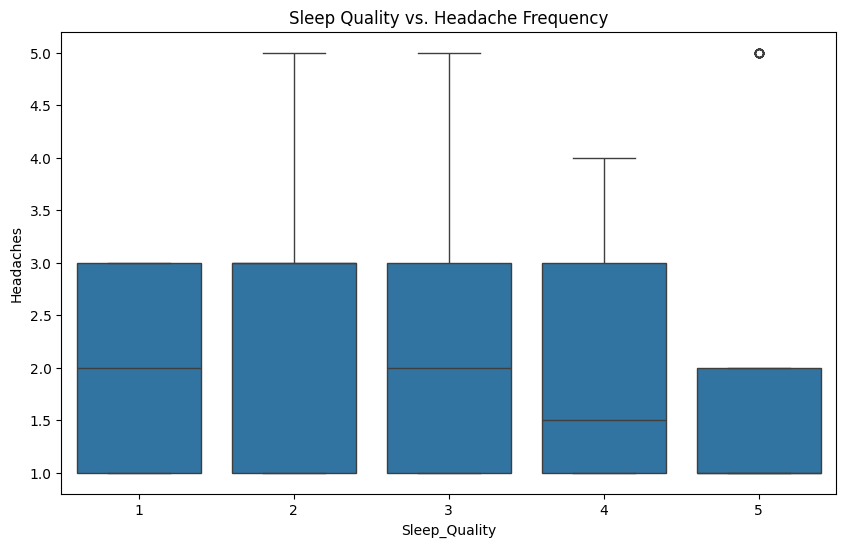

In [ ]:
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Headache Frequency (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y="Headaches", data=df)
plt.title('Sleep Quality vs. Headache Frequency')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ ความถี่ของอาการปวดหัว (Headache Frequency)
โดยแกน X คือระดับคุณภาพการนอน และแกน Y คือระดับความถี่ของอาการปวดหัวในนักเรียน

จากกราฟจะเห็นว่า :

กลุ่มที่มี Sleep Quality ต่ำ (ระดับ 1–2) มีค่ามัธยฐานของอาการปวดหัวสูงกว่า และมีการกระจายของข้อมูลกว้าง
หมายความว่านักเรียนที่นอนหลับไม่เพียงพอจะมีแนวโน้มปวดหัวบ่อย และความถี่ของอาการปวดหัวไม่คงที่

ในทางตรงกันข้าม กลุ่มที่มี Sleep Quality สูง (ระดับ 4–5) ค่ามัธยฐานของอาการปวดหัวลดลงอย่างชัดเจน และการกระจายของข้อมูลแคบลง
สะท้อนว่า นักเรียนที่นอนหลับดีมักมีอาการปวดหัวน้อยลงและสม่ำเสมอมากกว่า

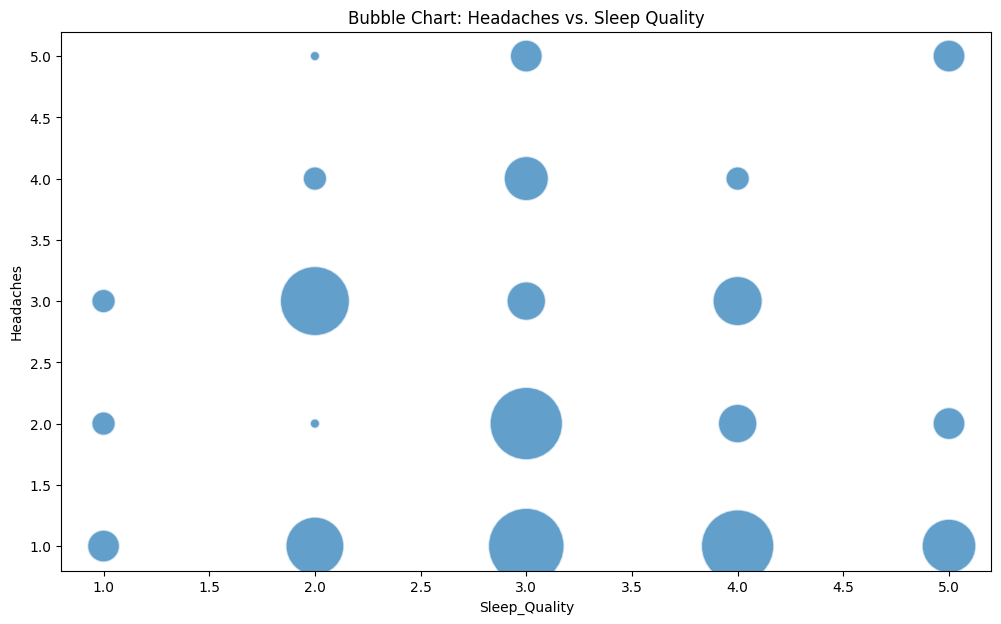

In [ ]:
# สร้างกราฟ Bubble Chart โดยให้ Sleep Quality (แกน X) เทียบกับ Headaches (แกน Y)
# 1. สร้างตารางนับจำนวน (Aggregate)
# เราจะนับว่า ในแต่ละคู่ (Sleep_Quality, Headaches) มีข้อมูลซ้ำกันกี่แถว
df_counts = df.groupby(['Sleep_Quality', 'Headaches']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot()
plt.figure(figsize=(12, 7))
sb.scatterplot(
    x='Sleep_Quality',
    y='Headaches',
    size='Count',
    data=df_counts,
    sizes=(50, 3000),
    alpha=0.7,
    legend= False
)

plt.title('Bubble Chart: Headaches vs. Sleep Quality')
plt.show()

กราฟ Bubble Chart นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ ความถี่ของอาการปวดหัว (Headaches)
โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน” ที่มีค่าการนอนและความถี่ปวดหัวอยู่ในระดับเดียวกัน
ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคนในแต่ละกลุ่มข้อมูล”

เมื่อพิจารณากราฟจะเห็นว่า :

ฟองขนาดใหญ่ส่วนใหญ่อยู่ในช่วง Sleep Quality ระดับ 2–3 และ Headaches ระดับ 2–3
แปลว่านักเรียนส่วนมากมีคุณภาพการนอนระดับปานกลาง และมีอาการปวดหัวอยู่ในระดับกลาง ๆ เช่นกัน

ฟองที่อยู่ทางด้านขวา (Sleep Quality สูง, Headaches ต่ำ) มีขนาดเล็กและกระจายตัวน้อย
หมายความว่า นักเรียนที่นอนหลับดีมักมีอาการปวดหัวน้อยกว่ากลุ่มอื่น

ในทางกลับกัน ฟองขนาดใหญ่ทางซ้าย (Sleep Quality ต่ำ, Headaches สูง)
สะท้อนว่า ผู้ที่นอนหลับไม่ดีมักมีแนวโน้มปวดหัวบ่อยกว่า

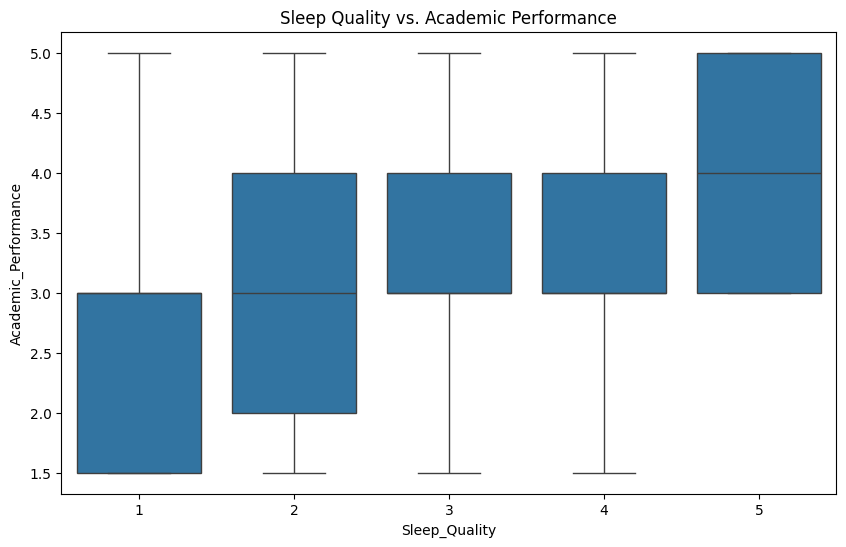

In [ ]:
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Academic Perfomance (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y='Academic_Performance', data=df)
plt.title('Sleep Quality vs. Academic Performance')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ ผลการเรียน (Academic Performance)
โดยแกน X คือระดับคุณภาพการนอน ส่วนแกน Y คือระดับผลการเรียนของนักเรียน

จากกราฟจะเห็นว่า :

เมื่อ Sleep Quality ต่ำ (ระดับ 1–2) ค่ามัธยฐานของผลการเรียนอยู่ในระดับค่อนข้างต่ำ และมีการกระจายกว้าง
หมายความว่านักเรียนกลุ่มนี้มีผลการเรียนไม่คงที่ และมีโอกาสได้คะแนนต่ำมากกว่า

เมื่อ Sleep Quality สูง (ระดับ 4–5) ค่ามัธยฐานของผลการเรียนเพิ่มขึ้นอย่างชัดเจน
แสดงว่านักเรียนที่นอนหลับดีมักมีผลการเรียนดีกว่า และมีการกระจายของคะแนนแคบลง

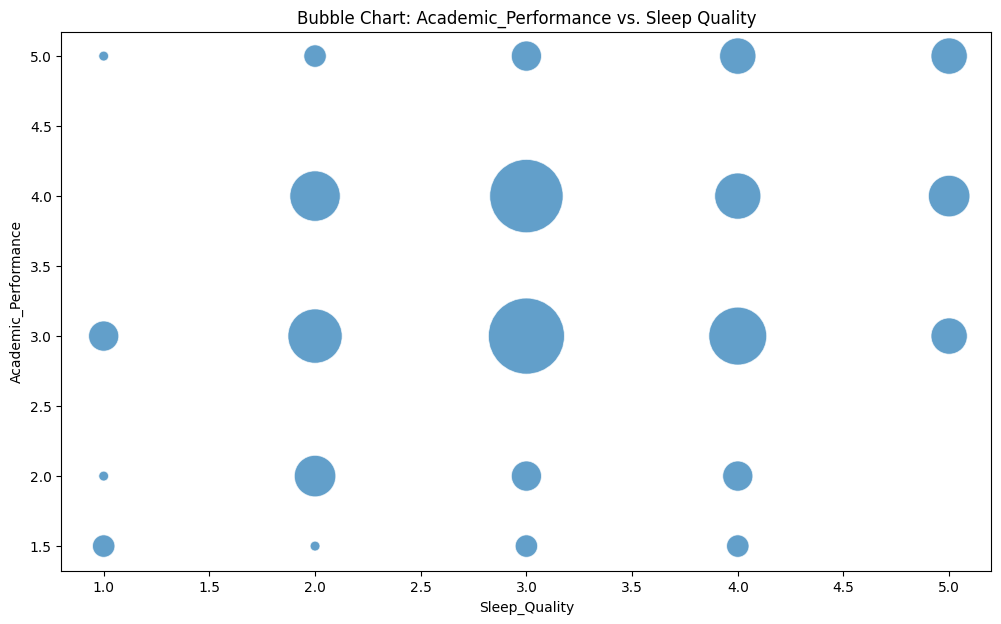

In [ ]:
# สร้างกราฟ Bubble Chart โดยให้ Sleep Quality (แกน X) เทียบกับ Academic_Performance (แกน Y)
# 1. สร้างตารางนับจำนวน (Aggregate)
# เราจะนับว่า ในแต่ละคู่ (Sleep_Quality, Academic_Performance) มีข้อมูลซ้ำกันกี่แถว
df_counts = df.groupby(['Sleep_Quality', 'Academic_Performance']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot()
plt.figure(figsize=(12, 7))
sb.scatterplot(
    x='Sleep_Quality',
    y='Academic_Performance',
    size='Count',
    data=df_counts,
    sizes=(50, 3000),
    alpha=0.7,
    legend= False
)

plt.title('Bubble Chart: Academic_Performance vs. Sleep Quality')
plt.show()

กราฟ Bubble Chart นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ ผลการเรียน (Academic Performance)
โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน” ที่มีค่าคุณภาพการนอนและผลการเรียนอยู่ในระดับเดียวกัน
ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคนในแต่ละกลุ่มข้อมูล”

เมื่อพิจารณากราฟจะเห็นว่า :

ฟองขนาดใหญ่ส่วนใหญ่อยู่ในช่วง Sleep Quality ระดับ 2–3 และ Academic Performance ระดับ 3–4
แปลว่านักเรียนส่วนใหญ่มีการนอนระดับปานกลาง และมีผลการเรียนในระดับปานกลางถึงดี

ฟองขนาดเล็กในมุมล่างซ้าย (Sleep Quality ต่ำ, Academic Performance ต่ำ)
แสดงถึงกลุ่มที่นอนหลับไม่ดีและมีแนวโน้มผลการเรียนต่ำ

ฟองในมุมขวาบน (Sleep Quality สูง, Academic Performance สูง) มีอยู่บ้างแต่ขนาดเล็กกว่า
หมายความว่าแม้นักเรียนที่นอนหลับดีมีจำนวนน้อยกว่า แต่กลุ่มนี้มักมีผลการเรียนสูงที่สุด

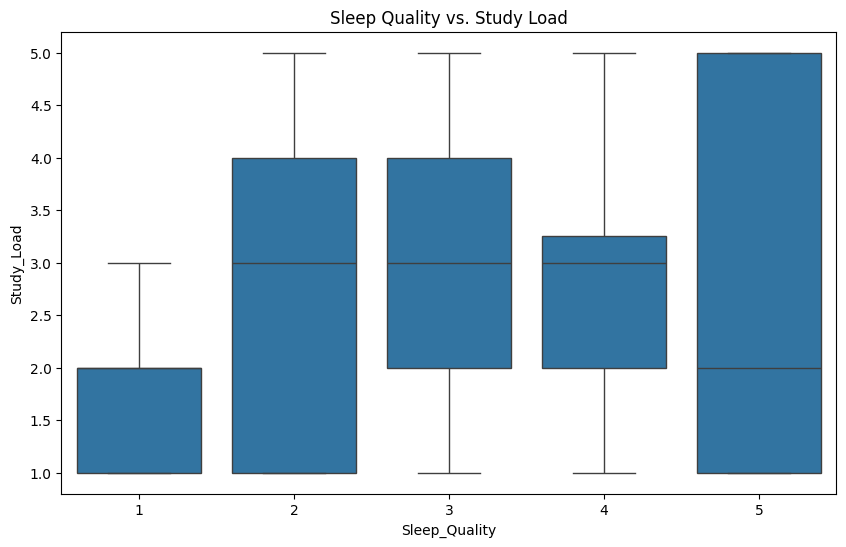

In [ ]:
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Study Load (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y='Study_Load', data=df)
plt.title('Sleep Quality vs. Study Load')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ ภาระการเรียน (Study Load)
โดยแกน X แทนระดับคุณภาพการนอน และแกน Y แทนระดับภาระงานหรือความหนักของการเรียน

จากกราฟจะเห็นว่า :

กลุ่มที่มี Sleep Quality ต่ำ (ระดับ 1–2) มีค่ามัธยฐานของภาระการเรียนอยู่ในระดับกลางถึงสูง และมีการกระจายค่อนข้างกว้าง
หมายความว่า นักเรียนที่นอนหลับไม่ดีมักรู้สึกว่ามีภาระการเรียนมากกว่ากลุ่มอื่น

ในขณะที่กลุ่มที่มี Sleep Quality สูง (ระดับ 4–5) ค่ามัธยฐานของ Study Load อยู่ในระดับปานกลางหรือต่ำกว่า และการกระจายแคบลง
แสดงให้เห็นว่าผู้ที่นอนหลับเพียงพอมักรู้สึกว่าภาระการเรียนไม่หนักจนเกินไป

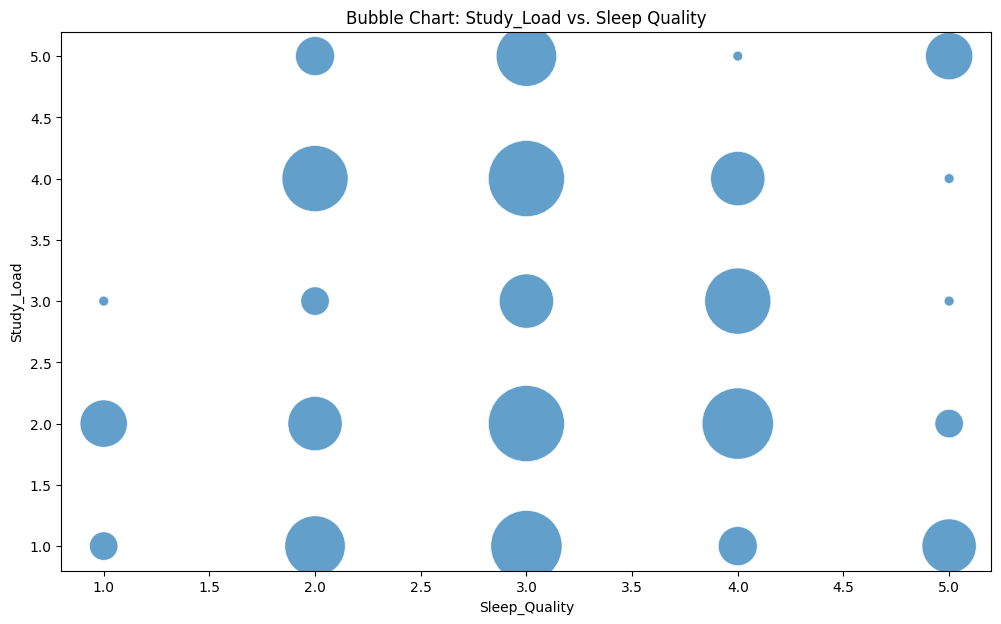

In [ ]:
# สร้างกราฟ Bubble Chart โดยให้ Sleep Quality (แกน X) เทียบกับ Study_Load (แกน Y)
# 1. สร้างตารางนับจำนวน (Aggregate)
# เราจะนับว่า ในแต่ละคู่ (Sleep_Quality, Study_Load) มีข้อมูลซ้ำกันกี่แถว
df_counts = df.groupby(['Sleep_Quality', 'Study_Load']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot()
plt.figure(figsize=(12, 7))
sb.scatterplot(
    x='Sleep_Quality',
    y='Study_Load',
    size='Count',
    data=df_counts,
    sizes=(50, 3000),
    alpha=0.7,
    legend= False
)

plt.title('Bubble Chart: Study_Load vs. Sleep Quality')
plt.show()

กราฟ Bubble Chart นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ ภาระการเรียน (Study Load)
โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน” ที่มีค่าคุณภาพการนอนและระดับภาระการเรียนในระดับเดียวกัน
ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคนในแต่ละกลุ่มข้อมูล”

เมื่อพิจารณากราฟจะเห็นว่า :

ฟองขนาดใหญ่ส่วนใหญ่อยู่ในช่วง Sleep Quality ระดับ 2–3 และ Study Load ระดับ 2–4
หมายความว่านักเรียนส่วนมากมีการนอนในระดับปานกลาง และมีภาระการเรียนอยู่ในระดับกลางเช่นกัน

ฟองขนาดเล็กในมุมขวาบน (Sleep Quality สูง, Study Load สูง)
บ่งบอกว่ากลุ่มที่นอนหลับดีและมีภาระการเรียนสูงมีจำนวนน้อย

ฟองทางซ้าย (Sleep Quality ต่ำ, Study Load สูง) มีอยู่บ้าง แสดงถึงนักเรียนที่นอนหลับไม่ดีแต่รู้สึกว่าภาระการเรียนหนัก

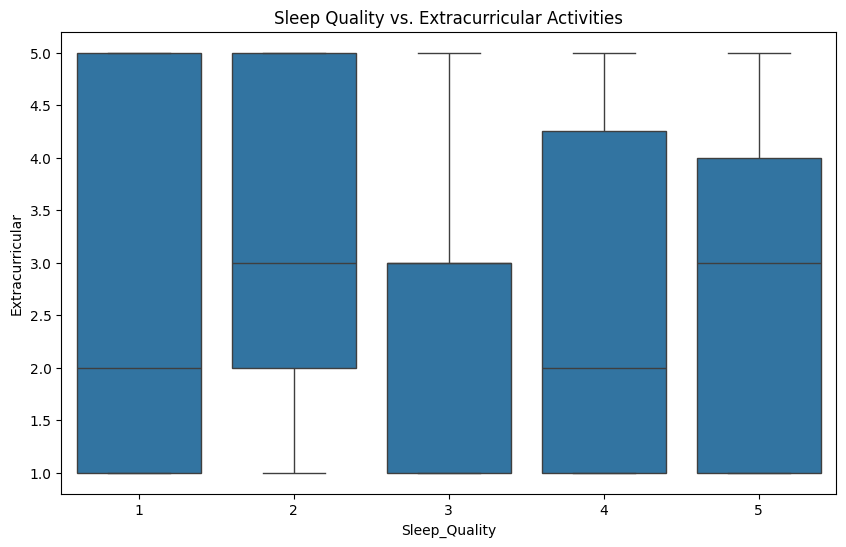

In [ ]:
# สร้างกราฟ boxplot โดยให้ Sleep Quality (แกน X) เทียบกับ Extracurricular Activities (แกน Y)
plt.figure(figsize=(10, 6))
sb.boxplot(x='Sleep_Quality', y='Extracurricular', data=df)
plt.title('Sleep Quality vs. Extracurricular Activities')
plt.show()

กราฟ Box plot นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ การเข้าร่วมกิจกรรมนอกหลักสูตร (Extracurricular Activities)
โดยแกน X คือระดับคุณภาพการนอน และแกน Y คือระดับการมีส่วนร่วมในกิจกรรมนอกหลักสูตรของนักเรียน

จากกราฟจะเห็นว่า :

กลุ่มที่มี Sleep Quality ต่ำ (ระดับ 1–2) มีค่ามัธยฐานของการทำกิจกรรมนอกหลักสูตรอยู่ในระดับกลางถึงต่ำ
และมีการกระจายของข้อมูลค่อนข้างกว้าง หมายความว่ากลุ่มนี้บางคนอาจไม่ค่อยร่วมกิจกรรมเพราะพักผ่อนไม่พอ

กลุ่มที่มี Sleep Quality ปานกลางถึงสูง (ระดับ 4–5) ค่ามัธยฐานของกิจกรรมนอกหลักสูตรเพิ่มขึ้นเล็กน้อย
และช่วงการกระจายของข้อมูลแคบลง สะท้อนว่านักเรียนที่นอนหลับเพียงพอมีแนวโน้มเข้าร่วมกิจกรรมมากขึ้นและสมดุลกว่า

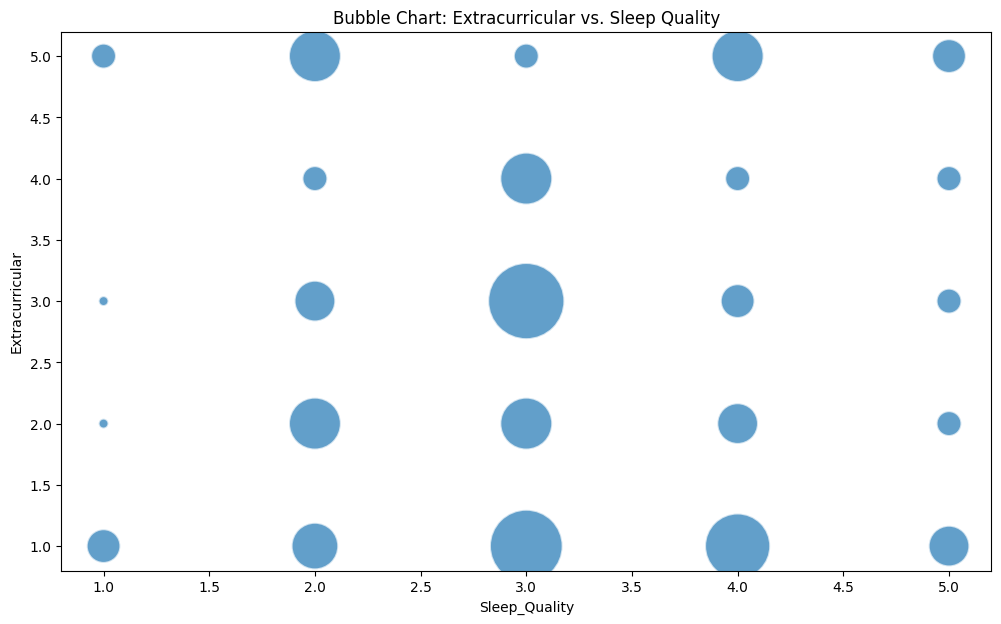

In [ ]:
# สร้างกราฟ Bubble Chart โดยให้ Sleep Quality (แกน X) เทียบกับ Extracurricular (แกน Y)
# 1. สร้างตารางนับจำนวน (Aggregate)
# เราจะนับว่า ในแต่ละคู่ (Sleep_Quality, Extracurricular) มีข้อมูลซ้ำกันกี่แถว
df_counts = df.groupby(['Sleep_Quality', 'Extracurricular']).size().reset_index(name='Count')

# 2. พล็อตด้วย sb.scatterplot()
plt.figure(figsize=(12, 7))
sb.scatterplot(
    x='Sleep_Quality',
    y='Extracurricular',
    size='Count',
    data=df_counts,
    sizes=(50, 3000),
    alpha=0.7,
    legend= False
)

plt.title('Bubble Chart: Extracurricular vs. Sleep Quality')
plt.show()

กราฟ Bubble Chart นี้แสดงความสัมพันธ์ระหว่าง คุณภาพการนอน (Sleep Quality) และ การเข้าร่วมกิจกรรมนอกหลักสูตร (Extracurricular Activities)
โดย แต่ละจุด (Bubble) แทน “กลุ่มนักเรียน” ที่มีระดับคุณภาพการนอนและระดับการเข้าร่วมกิจกรรมนอกหลักสูตรในช่วงเดียวกัน
ส่วน ขนาดของฟอง (Bubble size) แสดงถึง “จำนวนคนในแต่ละกลุ่มข้อมูล”

เมื่อพิจารณากราฟจะเห็นว่า :

ฟองขนาดใหญ่ส่วนใหญ่อยู่ในช่วง Sleep Quality ระดับ 2–3 และ Extracurricular ระดับ 2–3
หมายความว่านักเรียนส่วนมากมีคุณภาพการนอนระดับปานกลาง และเข้าร่วมกิจกรรมนอกหลักสูตรในระดับกลางเช่นกัน

ฟองขนาดเล็กทางขวา (Sleep Quality สูง, Extracurricular สูง) แสดงให้เห็นว่ามีนักเรียนบางกลุ่มที่นอนหลับดีและยังสามารถจัดสมดุลกับกิจกรรมนอกห้องเรียนได้

ฟองขนาดใหญ่ในช่วงซ้ายล่าง (Sleep Quality ต่ำ, Extracurricular ต่ำ) บ่งบอกว่าผู้ที่นอนหลับไม่ดีมักเข้าร่วมกิจกรรมน้อย

# Model Planning

ในส่วนนี้ เราจะวางแผนการสร้างแบบจำลอง Machine Learning เพื่อตอบปัญหาที่ตั้งไว้ใน Problem Framing

เป้าหมายหลักของเราคือการสร้างแบบจำลองที่สามารถทำนาย **"คุณภาพการนอน (Sleep Quality)"** ของนักเรียน โดยใช้ความเครียดและปัจจัยอื่นๆ เป็นตัวแปรในการทำนาย

---

**1. ประเภทของปัญหา (Problem Type)**

* นี่คือปัญหาประเภท **Classification** (การจำแนกประเภท) เนื่องจากตัวแปรเป้าหมาย (Sleep Quality) เป็นข้อมูลแบบกลุ่ม (Categorical) ที่มีระดับคะแนน 1, 2, 3, 4, หรือ 5

**2. การกำหนดตัวแปร (Variable Definition)**

* **ตัวแปรเป้าหมาย (Target Variable - y):**
    * `Sleep_Quality` (Kindly Rate your Sleep Quality 😴)
* **ตัวแปรอิสระ (Features - X):**
    * `Stress_Levels` (How would you rate your stress levels?)
    * `Headaches` (How many times a week do you suffer headaches 🤕?)
    * `Academic_Performance` (How would you rate you academic performance 👩‍🎓?)
    * `Study_Load` (how would you rate your study load?)
    * `Extracurricular` (How many times a week you practice extracurricular activities 🎾?)
    

**3. การเลือกแบบจำลอง (Model Selection)**

เราจะทำการทดสอบและเปรียบเทียบแบบจำลอง Classification 3 รูปแบบ เพื่อหารูปแบบที่แม่นยำที่สุด:

1.  **Logistic Regression**: แบบจำลองเชิงเส้น (Linear Model) ที่ดีสำหรับการเป็นแบบจำลองพื้นฐาน (Baseline)
2.  **Decision Tree**: แบบจำลองแบบต้นไม้ (Non-linear) ที่เข้าใจง่ายและสามารถตีความได้
3.  **Random Forest**: แบบจำลองแบบกลุ่ม (Ensemble Model) ที่ใช้หลักการของ Decision Trees หลายๆ ต้น เพื่อเพิ่มความแม่นยำและลด Overfitting

**4. การประเมินแบบจำลอง (Model Evaluation)**

* **Train-Test Split**: เราจะแบ่งข้อมูลทั้งหมดออกเป็น 2 ส่วน:
    * **Training Set (80%)**: ใช้สำหรับสอน (Train) แบบจำลอง
    * **Testing Set (20%)**: ใช้สำหรับทดสอบประสิทธิภาพของแบบจำลองกับข้อมูลที่ไม่เคยเห็นมาก่อน
* **ตัวชี้วัด (Metrics)**: เราจะใช้ **Accuracy** (ความแม่นยำโดยรวม) และ **Classification Report** (ซึ่งประกอบด้วย Precision, Recall, F1-score) เพื่อประเมินว่าแบบจำลองทำนายแต่ละคลาส (1-5) ได้ดีเพียงใด

#Model Building

In [ ]:
def train_student_models(df):
    """
    Trains 3 different models to predict sleep quality from survey answers.
    """
    # 1. Grab the features we want and what we're predicting
    try:
        target_column = 'Sleep_Quality'
        feature_columns = [
            'Headaches',
            'Academic_Performance',
            'Study_Load',
            'Extracurricular',
            'Stress_Levels'
        ]
        X = df[feature_columns]
        y = df[target_column]

    except KeyError as e:
        print(f"Oops! Can't find column {e} in the data.")
        print(f"Double-check the column_map to make sure everything's mapped right.")
        return None

    # 2. Split into training and testing sets (80/20 split)
    # random_state=42 keeps results consistent between runs
    # stratify=y makes sure each sleep rating (1-5) is evenly distributed
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # 3. Scale the features (logistic regression works better with scaled data)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 4. Set up our three models
    models = {
        'Logistic_Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Decision_Tree': DecisionTreeClassifier(random_state=42),
        'Random_Forest': RandomForestClassifier(random_state=42)
    }

    results = {}

    print("--- 🚀 Training models now... ---")

    for name, model in models.items():
        print(f"\nWorking on {name}...")

        # Logistic regression needs the scaled data
        if name == 'Logistic_Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            # Decision trees and random forests don't need scaling
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # 5. See how well it performed
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0)
        storeX = X
        storey = y
        storeX_train = X_train
        storey_train = y_train
        storeX_train_scaled = X_train_scaled
        storeX_test = X_test
        storey_test = y_test
        storey_pred = y_pred

        print(f"✅ {name} - Accuracy: {accuracy:.4f}")

        # Store everything for later
        results[name] = {
            'model': model,
            'test_accuracy': accuracy,
            'classification_report': report,
            'storeX': X,
            'storey': y,
            'storeX_train': X_train,
            'storey_train': y_train,
            'storeX_train_scaled' : X_train_scaled,
            'storeX_test': X_test,
            'storey_test': y_test,
            'storey_pred': y_pred,
        }

    # Keep the scaler around in case we need it later
    results['scaler'] = scaler

    print("\n--- ✅ Done! All models trained ---")
    return results

In [ ]:
# 1. Train all the models
model_results = train_student_models(df)

# 2. Show the detailed results for each model
if model_results:
    print("\n\n--- 📊 Logistic Regression Results ---")
    print(model_results['Logistic_Regression']['classification_report'])

    print("\n\n--- 📊 Decision Tree Results ---")
    print(model_results['Decision_Tree']['classification_report'])

    print("\n\n--- 📊 Random Forest Results ---")
    print(model_results['Random_Forest']['classification_report'])


--- 🚀 Training models now... ---

Working on Logistic_Regression...
✅ Logistic_Regression - Accuracy: 0.3654

Working on Decision_Tree...
✅ Decision_Tree - Accuracy: 0.9519

Working on Random_Forest...
✅ Random_Forest - Accuracy: 0.9519

--- ✅ Done! All models trained ---


--- 📊 Logistic Regression Results ---
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.50      0.22      0.30        23
           3       0.38      0.70      0.50        37
           4       0.26      0.21      0.23        24
           5       0.67      0.15      0.25        13

    accuracy                           0.37       104
   macro avg       0.36      0.26      0.26       104
weighted avg       0.39      0.37      0.33       104



--- 📊 Decision Tree Results ---
              precision    recall  f1-score   support

           1       0.67      0.57      0.62         7
           2       1.00      1.00      1.00        23
 

In [1]:
ผลลัพทธ์ของทั้ง 3 โมเดล

SyntaxError: invalid syntax (ipython-input-3860638561.py, line 1)

#Evaluation




--- 📊 Detailed Model Evaluation Metrics ---

--- Logistic_Regression ---
Accuracy: 0.3654
Misclassification Rate: 0.6346
Precision: 0.3907
Recall: 0.3654
F1-Score: 0.3281
Mean Absolute Error (MAE): 0.8846
Weighted Kappa: 0.1989

Confusion Matrix:


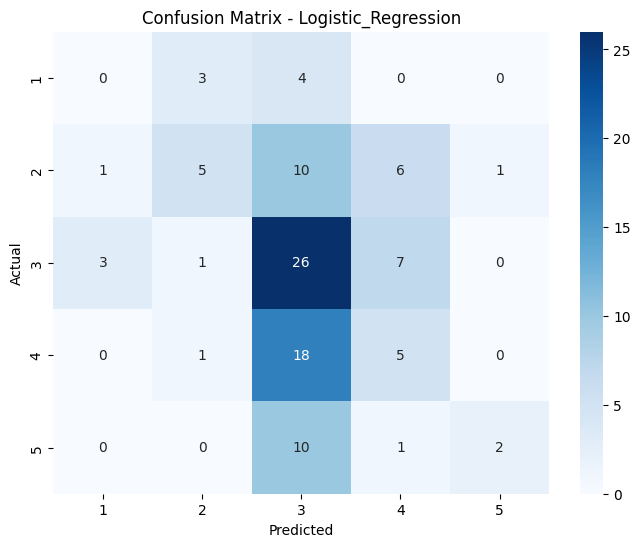


--- Decision_Tree ---
Accuracy: 0.9519
Misclassification Rate: 0.0481
Precision: 0.9509
Recall: 0.9519
F1-Score: 0.9502
Mean Absolute Error (MAE): 0.1154
Weighted Kappa: 0.8774

Confusion Matrix:


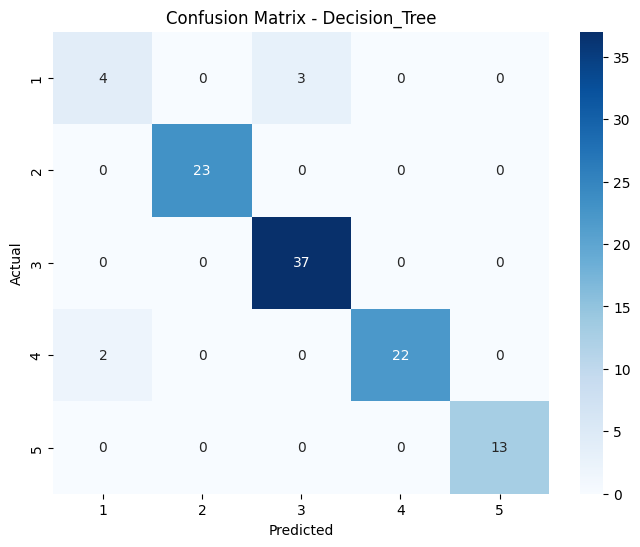


--- Random_Forest ---
Accuracy: 0.9519
Misclassification Rate: 0.0481
Precision: 0.9509
Recall: 0.9519
F1-Score: 0.9502
Mean Absolute Error (MAE): 0.1154
Weighted Kappa: 0.8774

Confusion Matrix:


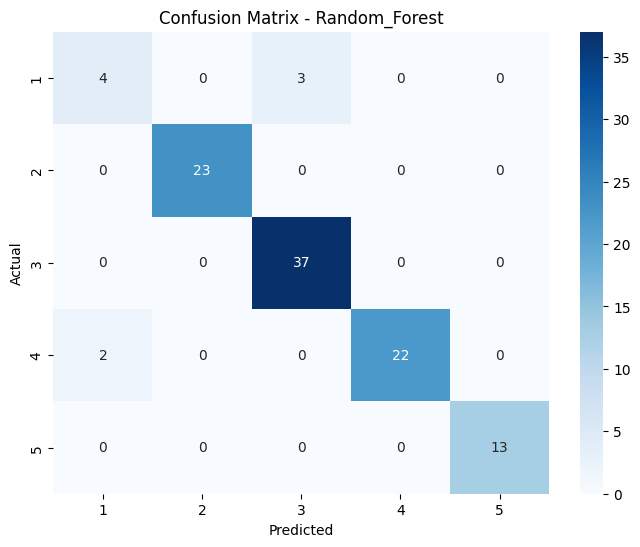

In [ ]:
from sklearn.metrics import mean_absolute_error, cohen_kappa_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and display MAE, Weighted Kappa, Confusion Matrix, and other metrics for each model
print("\n--- 📊 Detailed Model Evaluation Metrics ---")

for name, results in model_results.items():
    if name != 'scaler': # Exclude the scaler
        print(f"\n--- {name} ---")

        y_test = results['storey_test']
        y_pred = results['storey_pred']

        # Calculate Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # Calculate Misclassification Rate
        misclassification_rate = 1 - accuracy
        print(f"Misclassification Rate: {misclassification_rate:.4f}")

        # Calculate Precision (using 'weighted' average for multi-class)
        # Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
        # High precision relates to a low false positive rate.
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"Precision: {precision:.4f}")

        # Calculate Recall (using 'weighted' average for multi-class)
        # Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
        # High recall relates to a low false negative rate.
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"Recall: {recall:.4f}")

        # Calculate F1-Score (using 'weighted' average for multi-class)
        # The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        print(f"F1-Score: {f1:.4f}")


        # Calculate MAE (Treating as Ordinal)
        # MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
        # Lower MAE indicates better performance.
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Mean Absolute Error (MAE): {mae:.4f}")

        # Calculate Weighted Kappa
        # Weighted Kappa measures the agreement between two ratings, accounting for the possibility of the agreement occurring by chance.
        # A higher value indicates better agreement. The 'quadratic' weight penalizes larger disagreements more heavily.
        weighted_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')
        print(f"Weighted Kappa: {weighted_kappa:.4f}")

        # Calculate Confusion Matrix
        # A Confusion Matrix is a table used to evaluate the performance of a classification model.
        # Each row represents the instances in an actual class, while each column represents the instances in a predicted class.
        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")

        # Visualize Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=sorted(y_test.unique()),
                    yticklabels=sorted(y_test.unique()))
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

1. Logistic Regression

Confusion Matrix ของ Logistic Regression แสดงให้เห็นว่าผลการทำนายกระจายไม่แม่นยำมากนัก
หลายกลุ่มมีการทำนายผิดพลาด (ค่าที่ไม่อยู่บนเส้นทแยงมุมของตารางมีจำนวนมาก)
ส่งผลให้ค่าประสิทธิภาพโดยรวมค่อนข้างต่ำ

Accuracy = 0.3654 หมายความว่า โมเดลทำนายถูกต้องประมาณ 36.5% ของทั้งหมด

Precision = 0.3907, Recall = 0.3654, และ F1-Score = 0.3281
แปลว่า โมเดลมีความแม่นยำ (Precision) และความครอบคลุม (Recall) ค่อนข้างต่ำพอ ๆ กัน

MAE = 0.8846 แปลว่าค่าเฉลี่ยของความคลาดเคลื่อนระหว่างค่าทำนายและค่าจริงอยู่ที่เกือบ 1 ระดับ

Weighted Kappa = 0.1989 หมายถึงระดับ “ความเห็นพ้องกัน” ระหว่างผลจริงกับผลทำนายค่อนข้างต่ำ
โดยรวม :
โมเดล Logistic Regression มีแนวโน้มที่จะทำนายได้ไม่แม่นยำสำหรับข้อมูลประเภทนี้
อาจเพราะความสัมพันธ์ของตัวแปรเป็นเชิงซับซ้อน (ไม่เป็นเส้นตรง)
โมเดลเชิงเส้นจึงไม่สามารถจับรูปแบบข้อมูลได้ดี

2. Decision Tree

จาก Confusion Matrix ของ Decision Tree จะเห็นว่าค่าบนเส้นทแยงมุมมีจำนวนมาก
หมายความว่าโมเดลสามารถจำแนกคลาสได้ถูกต้องเกือบทุกกลุ่ม
แทบไม่มีความผิดพลาดในการทำนาย

Accuracy = 0.9519, Precision = 0.9509, Recall = 0.9519, F1 = 0.9502
แปลว่า ค่าทั้งหมดสูงมาก แสดงว่าโมเดลมีความแม่นยำและสามารถแยกกลุ่มได้อย่างถูกต้อง

MAE = 0.1154 แสดงว่าความคลาดเคลื่อนโดยเฉลี่ยค่อนข้างต่ำ

Weighted Kappa = 0.8774 บ่งบอกถึง “ความเห็นพ้องกันในระดับสูงมาก” ระหว่างผลจริงและผลทำนาย

โดยรวม :
มีประสิทธิภาพค่อนข้างดีในชุดข้อมูลนี้ โมเดลสามารถจับเงื่อนไขที่ซับซ้อนได้ และแยกกลุ่มข้อมูลได้อย่างแม่นยำ

3. Random Forest


Accuracy = 0.9519, Precision = 0.9509, Recall = 0.9519, F1 = 0.9502
แปลว่า ประสิทธิภาพใกล้เคียงกับ Decision Tree แทบทุกค่า

MAE = 0.1154 และ Weighted Kappa = 0.8774
แปลว่า ความแม่นยำค่อนข้างสูงและความสอดคล้องระหว่างค่าทำนายกับค่าจริงดีเยี่ยม

โดยรวม :
Random Forest ซึ่งเป็นโมเดลแบบรวมหลาย Decision Trees เข้าด้วยกัน
สามารถรักษาความแม่นยำได้ดีมาก และลดโอกาสของ overfitting เมื่อเทียบกับ Decision Tree เดี่ยว
จึงเป็นโมเดลที่ “เสถียร” และ “เชื่อถือได้” ที่สุดในชุดนี้

In [ ]:
# ข้อมูล Metrics ที่ได้
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.3654, 0.9519, 0.9519],
    'Precision (Weighted Avg)': [0.39, 0.95, 0.95],
    'Recall (Weighted Avg)': [0.37, 0.95, 0.95],
    'F1-Score (Weighted Avg)': [0.33, 0.95, 0.95]
}

df_metrics = pd.DataFrame(data)

print("--- ตารางสรุป Metrics ---")
print(df_metrics.to_string(index=False)) # แสดงตารางทั้งหมด

--- ตารางสรุป Metrics (Pandas DataFrame) ---
              Model  Accuracy  Precision (Weighted Avg)  Recall (Weighted Avg)  F1-Score (Weighted Avg)
Logistic Regression    0.3654                      0.39                   0.37                     0.33
      Decision Tree    0.9519                      0.95                   0.95                     0.95
      Random Forest    0.9519                      0.95                   0.95                     0.95


/tmp/ipython-input-138376536.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')


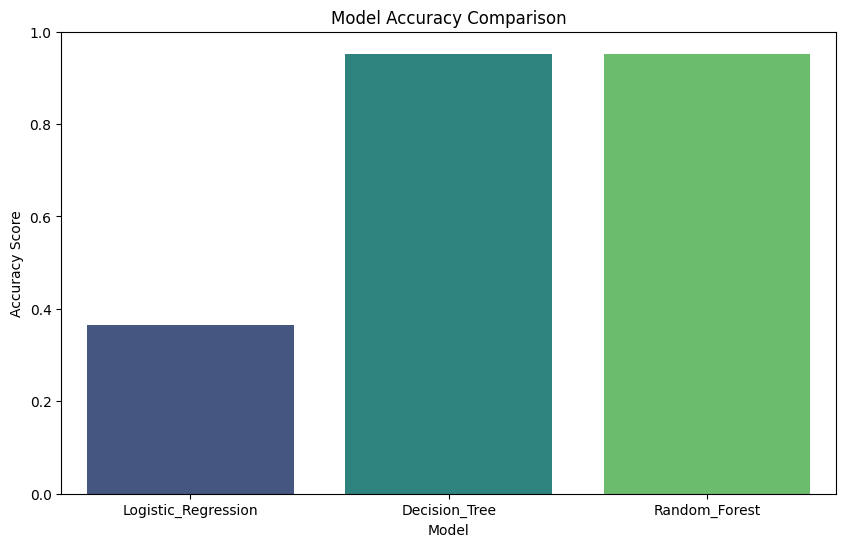

/tmp/ipython-input-138376536.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-score (Weighted)', data=metrics_df, palette='viridis')


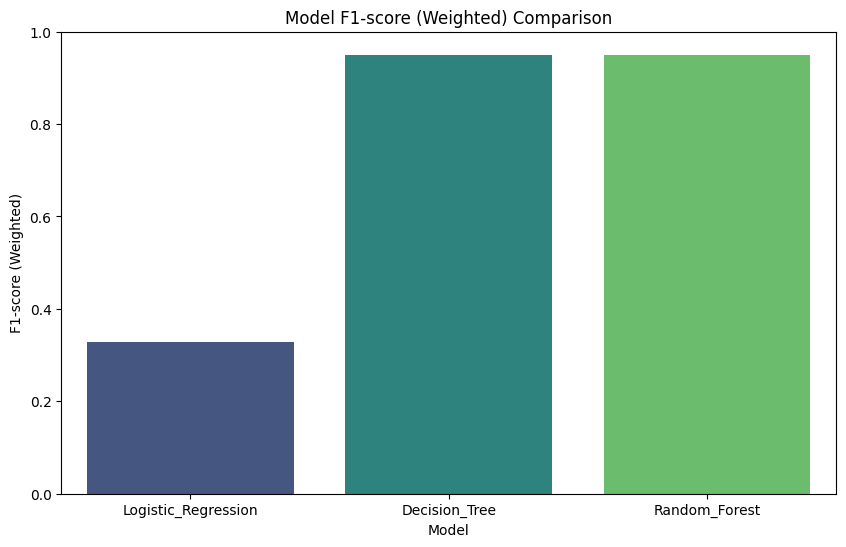

/tmp/ipython-input-138376536.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall (Weighted)', data=metrics_df, palette='viridis')


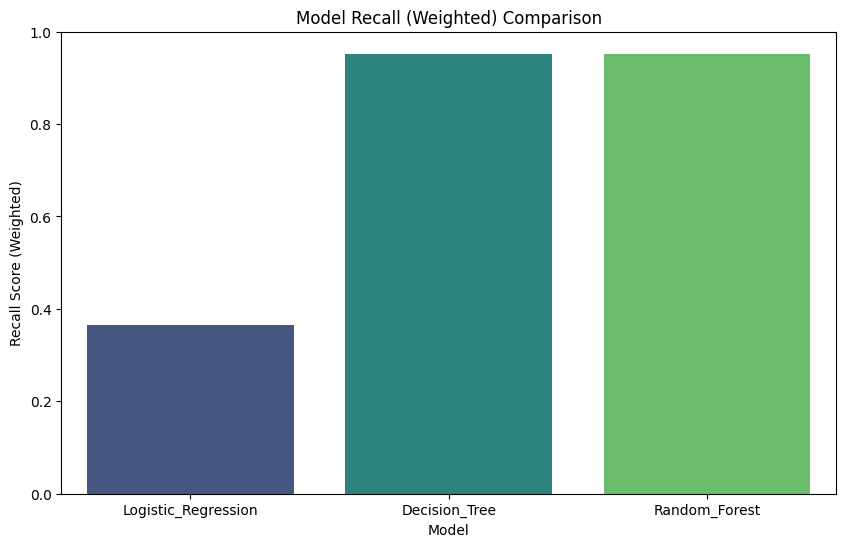

/tmp/ipython-input-138376536.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision (Weighted)', data=metrics_df, palette='viridis')


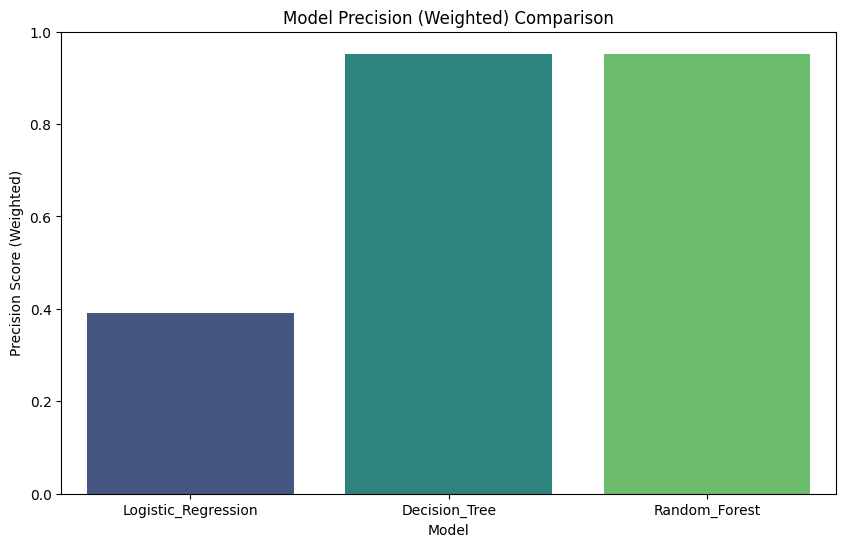

In [ ]:
# Prepare data for plotting
model_names = list(model_results.keys())
model_names.remove('scaler') # Exclude scaler

accuracy_scores = [model_results[name]['test_accuracy'] for name in model_names]
f1_scores = [f1_score(model_results[name]['storey_test'], model_results[name]['storey_pred'], average='weighted', zero_division=0) for name in model_names]
recall_scores = [recall_score(model_results[name]['storey_test'], model_results[name]['storey_pred'], average='weighted', zero_division=0) for name in model_names]
precision_scores = [precision_score(model_results[name]['storey_test'], model_results[name]['storey_pred'], average='weighted', zero_division=0) for name in model_names]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1-score (Weighted)': f1_scores,
    'Recall (Weighted)': recall_scores,
    'Precision (Weighted)': precision_scores
})

# Plot Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score (Weighted)', data=metrics_df, palette='viridis')
plt.title('Model F1-score (Weighted) Comparison')
plt.ylabel('F1-score (Weighted)')
plt.ylim(0, 1)
plt.show()

## Plot Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall (Weighted)', data=metrics_df, palette='viridis')
plt.title('Model Recall (Weighted) Comparison')
plt.ylabel('Recall Score (Weighted)')
plt.ylim(0, 1)
plt.show()


## Plot Precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision (Weighted)', data=metrics_df, palette='viridis')
plt.title('Model Precision (Weighted) Comparison')
plt.ylabel('Precision Score (Weighted)')
plt.ylim(0, 1)
plt.show()

1. Model Accuracy Comparison

จากกราฟแรกจะเห็นว่า

Decision Tree และ Random Forest มีค่า Accuracy สูงมาก (เกือบ 1.0 หรือประมาณ 95%)
หมายถึงโมเดลทั้งสองสามารถทำนายได้ถูกต้องในสัดส่วนสูงของข้อมูลทั้งหมด

ในขณะที่ Logistic Regression มีค่า Accuracy ต่ำ (ประมาณ 0.36)
แสดงว่าโมเดลเชิงเส้นนี้ไม่เหมาะกับข้อมูลที่มีความซับซ้อนหรือมีความไม่เป็นเชิงเส้น

โดยรวม : Decision Tree และ Random Forest มีความแม่นยำสูงและเหมาะกับข้อมูลลักษณะนี้มากกว่า Logistic Regression

2. Model F1-score (Weighted) Comparison

F1-score เป็นการผสมระหว่าง Precision และ Recall
ใช้ประเมินความสมดุลระหว่าง “ความแม่นยำในการทำนาย” และ “ความสามารถในการจับค่าจริง”

จากกราฟจะเห็นว่า

Decision Tree และ Random Forest มีค่า F1-score ใกล้เคียงกันและอยู่ในระดับสูง (เกือบ 1.0)
แสดงถึงความสมดุลระหว่างความแม่นยำและความครอบคลุมของการทำนาย

ส่วน Logistic Regression มีค่า F1-score ต่ำมาก (ประมาณ 0.3)
บ่งชี้ว่าโมเดลนี้ไม่สามารถรักษาสมดุลระหว่าง Precision และ Recall ได้ดี

โดยรวม : โมเดลที่มี F1-score สูงบ่งบอกถึงการทำงานที่สมดุลและแม่นยำ ซึ่งในกรณีนี้คือ Decision Tree และ Random Forest

3. Model Recall (Weighted) Comparison



จากกราฟจะเห็นว่า

Decision Tree และ Random Forest มีค่า Recall ใกล้เคียงกันและอยู่ในระดับสูงมาก (ประมาณ 0.95)
หมายถึงโมเดลสามารถทำนายกลุ่มเป้าหมายได้ถูกต้องเกือบทั้งหมด

ขณะที่ Logistic Regression มีค่า Recall ต่ำกว่าอย่างชัดเจน

โดยรวม : โมเดลแบบ Tree-based สามารถ “จับข้อมูลจริงได้แม่นยำกว่า” และมีแนวโน้มลดความผิดพลาดจาก False Negative ได้ดีกว่า

4. Model Precision (Weighted) Comparison

Precision แสดง “ความถูกต้องของผลทำนาย” —
ว่าผลที่โมเดลทำนายว่าเป็นคลาสนั้น จริง ๆ แล้วถูกต้องมากน้อยแค่ไหน

จากกราฟ

Decision Tree และ Random Forest ยังคงมีค่า Precision สูง (ประมาณ 0.95)
แสดงว่าโมเดลทั้งสองทำนายได้แม่นยำ ไม่ค่อยมี False Positive

ในขณะที่ Logistic Regression มีค่า Precision ต่ำกว่า (ประมาณ 0.39)

โดยรวม : การที่ Tree-based Models มีค่า Precision สูง แปลว่าผลลัพธ์ที่โมเดลทำนายว่า “ใช่” มีโอกาสถูกต้องเกือบทั้งหมด


--- 📊 Random Forest Feature Importance ---


,Feature,Importance
4,Stress_Levels,0.222050
3,Extracurricular,0.207186
1,Academic_Performance,0.205527
0,Headaches,0.194292
2,Study_Load,0.170945


/tmp/ipython-input-2835224139.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


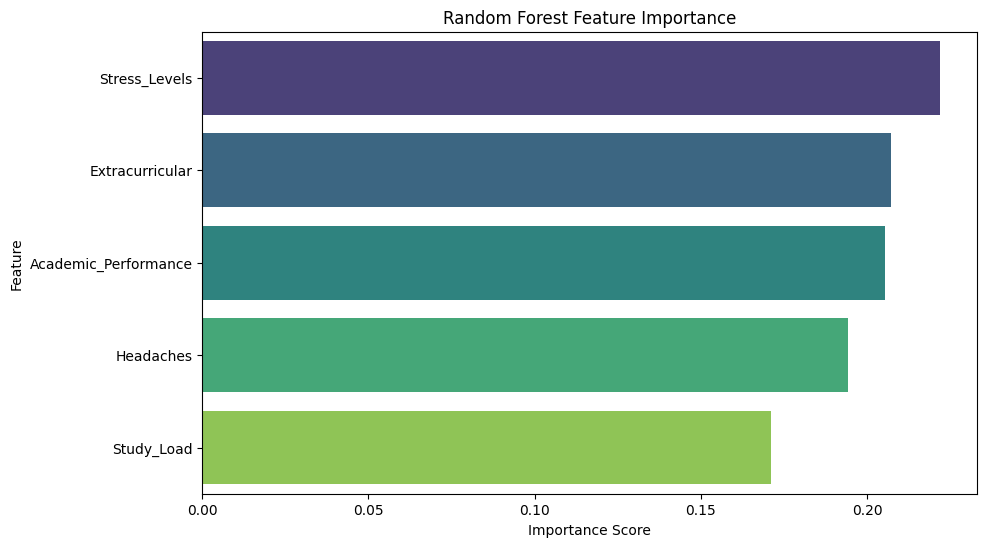

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Perform Feature Importance Analysis for Random Forest
if 'Random_Forest' in model_results and 'model' in model_results['Random_Forest']:
    rf_model = model_results['Random_Forest']['model']
    feature_names = model_results['Random_Forest']['storeX'].columns
    importances = rf_model.feature_importances_

    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\n--- 📊 Random Forest Feature Importance ---")
    display(feature_importance_df)

    # Visualize Feature Importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

else:
    print("Random Forest model not found in model_results. Please ensure the models are trained.")

กราฟนี้แสดง “ความสำคัญของตัวแปร (Feature Importance)” ที่โมเดล Random Forest ใช้ในการตัดสินผลลัพธ์
โดยค่าที่สูงกว่า หมายถึงตัวแปรนั้นมีผลต่อการทำนายของโมเดลมากกว่า

จากกราฟและตารางด้านบนจะเห็นได้ว่า:


1	Stress Levels	0.2225	มีผลมากที่สุดต่อผลการทำนาย แสดงว่าระดับความเครียดเป็นปัจจัยหลักที่ส่งผลต่อเป้าหมายของโมเดล

2	Extracurricular (กิจกรรมเสริม)	0.2072	มีอิทธิพลสูง รองลงมาจากความเครียด อาจสะท้อนถึงสมดุลชีวิตและเวลานอน

3	Academic Performance (ผลการเรียน)	0.2055	มีความสัมพันธ์กับผลลัพธ์ของโมเดลในระดับสูง บ่งชี้ว่านักเรียนที่ผลการเรียนดีมักมีรูปแบบการนอนและภาวะทางจิตใจต่างออกไป

4	Headaches (อาการปวดหัว)	0.1949	มีความสำคัญในระดับปานกลาง สอดคล้องกับแนวโน้มที่ว่าการนอนหรือความเครียดมีผลต่ออาการทางกาย

5	Study Load (ภาระการเรียน)	0.1795	มีผลน้อยที่สุดในกลุ่ม แต่ยังเป็นปัจจัยที่มีความเชื่อมโยงกับพฤติกรรมการนอนและสุขภาพจิตโดยรวม

ซึ่งแปลว่า  :

Stress Levels มีค่า Importance สูงสุด (0.2225)
ซึ่งหมายความว่า “ระดับความเครียด” เป็นปัจจัยสำคัญที่สุดในการคาดการณ์ของโมเดล
สอดคล้องกับสมมติฐานของโครงการที่ว่า ความเครียดมีอิทธิพลต่อการนอนและสุขภาพโดยรวมของนักเรียน

ตัวแปรรองอย่าง Extracurricular (กิจกรรมเสริม) และ Academic Performance (ผลการเรียน)
มีอิทธิพลสูงใกล้เคียงกัน (ประมาณ 0.20)
แสดงให้เห็นว่า “การมีสมดุลระหว่างการเรียนและกิจกรรมเสริม”
มีความเกี่ยวข้องกับคุณภาพการนอนและภาวะความเครียดของนักเรียน

ส่วน Headaches (อาการปวดหัว) และ Study Load (ภาระการเรียน)
แม้มีค่า Importance ต่ำกว่า แต่ยังสะท้อนให้เห็นถึงอาการทางร่างกายและภาระงานที่อาจส่งผลทางอ้อมต่อการนอนหลับ

# Compare Performance: วิเคราะห์ข้อดี – ข้อเสียและสรุป

**1. Logistic Regression**
*   **ข้อดี:** เข้าใจง่าย, ประมวลผลเร็ว
*   **ข้อเสีย:** ประสิทธิภาพต่ำสุด, ไม่จับความสัมพันธ์ซับซ้อน

**2. Decision Tree**
*   **ข้อดี:** เข้าใจง่าย, แม่นยำสูง, ไม่ต้อง Scaling
*   **ข้อเสีย:** มีแนวโน้ม Overfitting, ไม่เสถียรเท่าที่ควร

**3. Random Forest**
*   **ข้อดี:** แม่นยำสูงสุด, Overfitting น้อยกว่า Decision Tree, จัดการความสัมพันธ์ซับซ้อนได้ดี
*   **ข้อเสีย:** ตีความยาก (Black Box), ใช้เวลาประมวลผลนานกว่า Logistic Regression

**สรุป Insight: เลือกใช้โมเดลไหนต่อ**
จากผลการประเมิน โมเดล **Random Forest** และ **Decision Tree** มีประสิทธิภาพสูงกว่า **Logistic Regression** อย่างชัดเจน โดย **Random Forest** ให้ความแม่นยำสูงสุดและทนทานต่อ Overfitting ได้ดีกว่า จึงเป็นโมเดลที่เหมาะสมที่สุดสำหรับปัญหาการทำนายคุณภาพการนอนนี้

# Summary: ความสัมพันธ์ระหว่างคุณภาพการนอนและความเครียด

จากการวิเคราะห์ข้อมูลและผลลัพธ์โมเดล Random Forest ที่แม่นยำที่สุด สรุปความสัมพันธ์ระหว่างคุณภาพการนอน (Sleep Quality) และความเครียด (Stress Levels) ได้ดังนี้:

1.  **ความเครียดมีผลสำคัญต่อคุณภาพการนอน:** `Stress_Levels` เป็นปัจจัยหลักในการทำนายคุณภาพการนอน

2.  **คุณภาพการนอนและความเครียดสัมพันธ์แบบผกผัน:**
    *   นอนหลับดี → ความเครียดมีแนวโน้มลดลง
    *   นอนหลับไม่ดี → ความเครียดมีแนวโน้มสูงขึ้น

3.  **ปัจจัยอื่นก็มีผล:** นอกจากความเครียด ปัจจัยอื่น (Academic Performance, Extracurricular, Headaches, Study Load) ก็ส่งผลต่อคุณภาพการนอนเช่นกัน

**สรุปโดยรวม:** คุณภาพการนอนมีความสัมพันธ์อย่างมากกับระดับความเครียด โดยการนอนที่ดีขึ้นสัมพันธ์กับความเครียดที่ลดลง และการนอนที่แย่ลงสัมพันธ์กับความเครียดที่สูงขึ้น ซึ่งเป็นผลรวมจากหลายปัจจัย